In [ ]:
# General imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import Data

In [2]:
train_file='D:/Python_Practice/Data/loan_data_train.csv'
test_file='D:/Python_Practice/Data/loan_data_test.csv'

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

In [4]:
df_train.head()
df_test.head()

df_train.sample(10)

df_test.shape
df_train.shape
df_train.columns

Index(['ID', 'Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [5]:
df_test.sample()
df_test.columns

Index(['ID', 'Amount.Requested', 'Amount.Funded.By.Investors', 'Loan.Length',
       'Loan.Purpose', 'Debt.To.Income.Ratio', 'State', 'Home.Ownership',
       'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [ ]:
# Data Visualisation

In [6]:
df_train.dtypes

ID                                float64
Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [7]:
df_train.dtypes.unique()

array([dtype('float64'), dtype('O')], dtype=object)

In [8]:
obj_cols= df_train.select_dtypes('object').columns
obj_cols,len(obj_cols)

(Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
        'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
        'Home.Ownership', 'FICO.Range', 'Open.CREDIT.Lines',
        'Revolving.CREDIT.Balance', 'Employment.Length'],
       dtype='object'), 12)

In [9]:
print(df_train[obj_cols].shape)
df_train[obj_cols].sample(5)

(2200, 12)


,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Employment.Length
116,24000,24000,15.80%,60 months,debt_consolidation,16.73%,NC,MORTGAGE,665-669,10,24126,7 years
2089,10000,10000,14.65%,36 months,debt_consolidation,12.04%,CA,RENT,710-714,6,12139,3 years
1848,17475,17475,9.91%,36 months,credit_card,17.76%,NJ,RENT,730-734,15,17261,2 years
1957,9950,9925,13.11%,36 months,debt_consolidation,24.21%,MI,MORTGAGE,705-709,17,16618,10+ years
454,12000,12000,13.11%,36 months,debt_consolidation,17.04%,WA,MORTGAGE,695-699,9,41871,3 years


In [10]:
df_train.shape

(2200, 15)

In [12]:
df_train.drop(['Amount.Funded.By.Investors','ID'],axis=1, inplace=True)

KeyError: "['Amount.Funded.By.Investors' 'ID'] not found in axis"

In [13]:
df_train.shape


(2200, 13)

In [14]:
df_train.columns

Index(['Amount.Requested', 'Interest.Rate', 'Loan.Length', 'Loan.Purpose',
       'Debt.To.Income.Ratio', 'State', 'Home.Ownership', 'Monthly.Income',
       'FICO.Range', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length'],
      dtype='object')

In [15]:
for col in ['Amount.Requested','Open.CREDIT.Lines','Revolving.CREDIT.Balance']: 
    df_train[col]=pd.to_numeric(df_train[col],errors='coerce')

In [16]:
df_train.dtypes

Amount.Requested                  float64
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [17]:
for col in ['Interest.Rate','Debt.To.Income.Ratio']: 
    print(col)
    df_train[col]=df_train[col].str.replace("%","")

Interest.Rate
Debt.To.Income.Ratio


In [18]:
df_train['Debt.To.Income.Ratio'].sample(10)

147     20.95
1894    27.14
510     27.06
1574    20.32
1068    24.74
1249     7.96
463     10.61
1021    29.19
502     16.44
795     18.99
Name: Debt.To.Income.Ratio, dtype: object

In [19]:
for col in ['Debt.To.Income.Ratio','Interest.Rate']: 
    df_train[col]=pd.to_numeric(df_train[col],errors='coerce')

In [20]:
df_train.dtypes

Amount.Requested                  float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [21]:
df_train['Interest.Rate'].sample(5)

820      8.88
508     11.86
876      9.91
1419    16.29
249     10.75
Name: Interest.Rate, dtype: float64

In [22]:
df_train['Loan.Length'].unique()

array(['60 months', '36 months', nan, '.'], dtype=object)

In [23]:
k=df_train['FICO.Range'].str.split("-",expand=True).astype(float)

In [24]:
k.head(5)

,0,1
0,720.0,724.0
1,710.0,714.0
2,690.0,694.0
3,710.0,714.0
4,730.0,734.0


In [25]:
df_train['FICO.Range'].head(5)

0    720-724
1    710-714
2    690-694
3    710-714
4    730-734
Name: FICO.Range, dtype: object

In [26]:
k['Average'] = (k[0]+k[1])/2.0

In [27]:
k.head(5)

,0,1,Average
0,720.0,724.0,722.0
1,710.0,714.0,712.0
2,690.0,694.0,692.0
3,710.0,714.0,712.0
4,730.0,734.0,732.0


In [28]:
df_train['FICO'] = 0.5 *(k[0]+k[1])

In [29]:
del df_train['FICO.Range']

In [30]:
df_train.dtypes

Amount.Requested                  float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
FICO                              float64
dtype: object

In [53]:
df_train['Employment.Length'] =df_train['Employment.Length'].str.replace('year',"")
df_train['Employment.Length'] =df_train['Employment.Length'].str.replace('years',"")

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [32]:
df_train['Employment.Length'].value_counts()

10+ s    575
< 1      229
2 s      217
3 s      203
5 s      181
4 s      162
1        159
6 s      134
7 s      109
8 s       95
9 s       66
.          1
Name: Employment.Length, dtype: int64

In [52]:
df_train['Employment.Length'] =np.where(df_train['Employment.Length'].str[:2]=='10',10,
                                        df_train['Employment.Length'])

df_train['Employment.Length'] =np.where(df_train['Employment.Length'].str[0]=='<',0,
                                        df_train['Employment.Length'])


AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [34]:
df_train['Employment.Length'].value_counts()

10     575
0      229
2 s    217
3 s    203
5 s    181
4 s    162
1      159
6 s    134
7 s    109
8 s     95
9 s     66
.        1
Name: Employment.Length, dtype: int64

In [35]:
df_train['Employment.Length'] = pd.to_numeric(df_train['Employment.Length'] ,errors='coerce')

In [36]:
df_train.dtypes

Amount.Requested                  float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                 float64
FICO                              float64
dtype: object

In [37]:
df_train['Home.Ownership'].unique()

array(['MORTGAGE', 'OWN', 'RENT', 'OTHER', nan, 'NONE'], dtype=object)

In [38]:
cat_cols=df_train.select_dtypes(['object']).columns
cat_cols

Index(['Loan.Length', 'Loan.Purpose', 'State', 'Home.Ownership'], dtype='object')

In [41]:
print("*"*50)
for col in cat_cols:
    print(col)
    print("-"*50)
    print(df_train[col].nunique())
    print("-"*50)
    print(df_train[col].value_counts())
    print("*"*50)

**************************************************
Loan.Length
--------------------------------------------------
3
--------------------------------------------------
36 months    1722
60 months     476
.               1
Name: Loan.Length, dtype: int64
**************************************************
Loan.Purpose
--------------------------------------------------
14
--------------------------------------------------
debt_consolidation    1147
credit_card            394
other                  174
home_improvement       135
major_purchase          84
small_business          80
car                     45
wedding                 35
medical                 26
moving                  25
house                   19
vacation                18
educational             14
renewable_energy         3
Name: Loan.Purpose, dtype: int64
**************************************************
State
--------------------------------------------------
46
--------------------------------------------------
CA   

In [44]:
to_store = []
new_cols = []

for col in cat_cols:
    
    freqs = df_train[col].value_counts()
    categories = freqs.index[freqs>20]
    to_store.append((col,categories))
    
    for category in categories:
        name = col+'.'+category
        new_cols.append(name)
        df_train[name]=(df_train[col]==category).astype(int)
    del df_train[col]
    print(col)

Loan.Length
Loan.Purpose
State
Home.Ownership


In [45]:
df_train.columns.drop(new_cols)

Index(['Amount.Requested', 'Interest.Rate', 'Debt.To.Income.Ratio',
       'Monthly.Income', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length', 'FICO'],
      dtype='object')

In [46]:

numerical = df_train[df_train.columns.drop(new_cols)]
numerical.shape

(2200, 9)

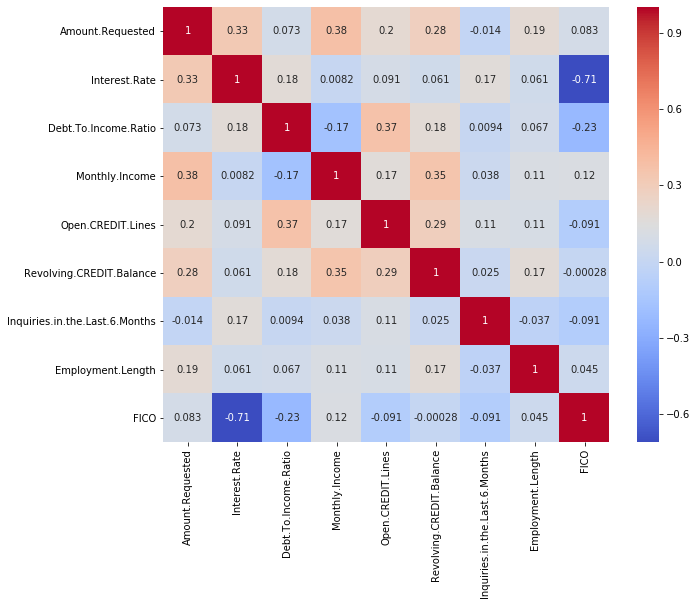

In [47]:
ax, fig = plt.subplots(figsize=(10,8))
sns.heatmap(numerical.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Outliers

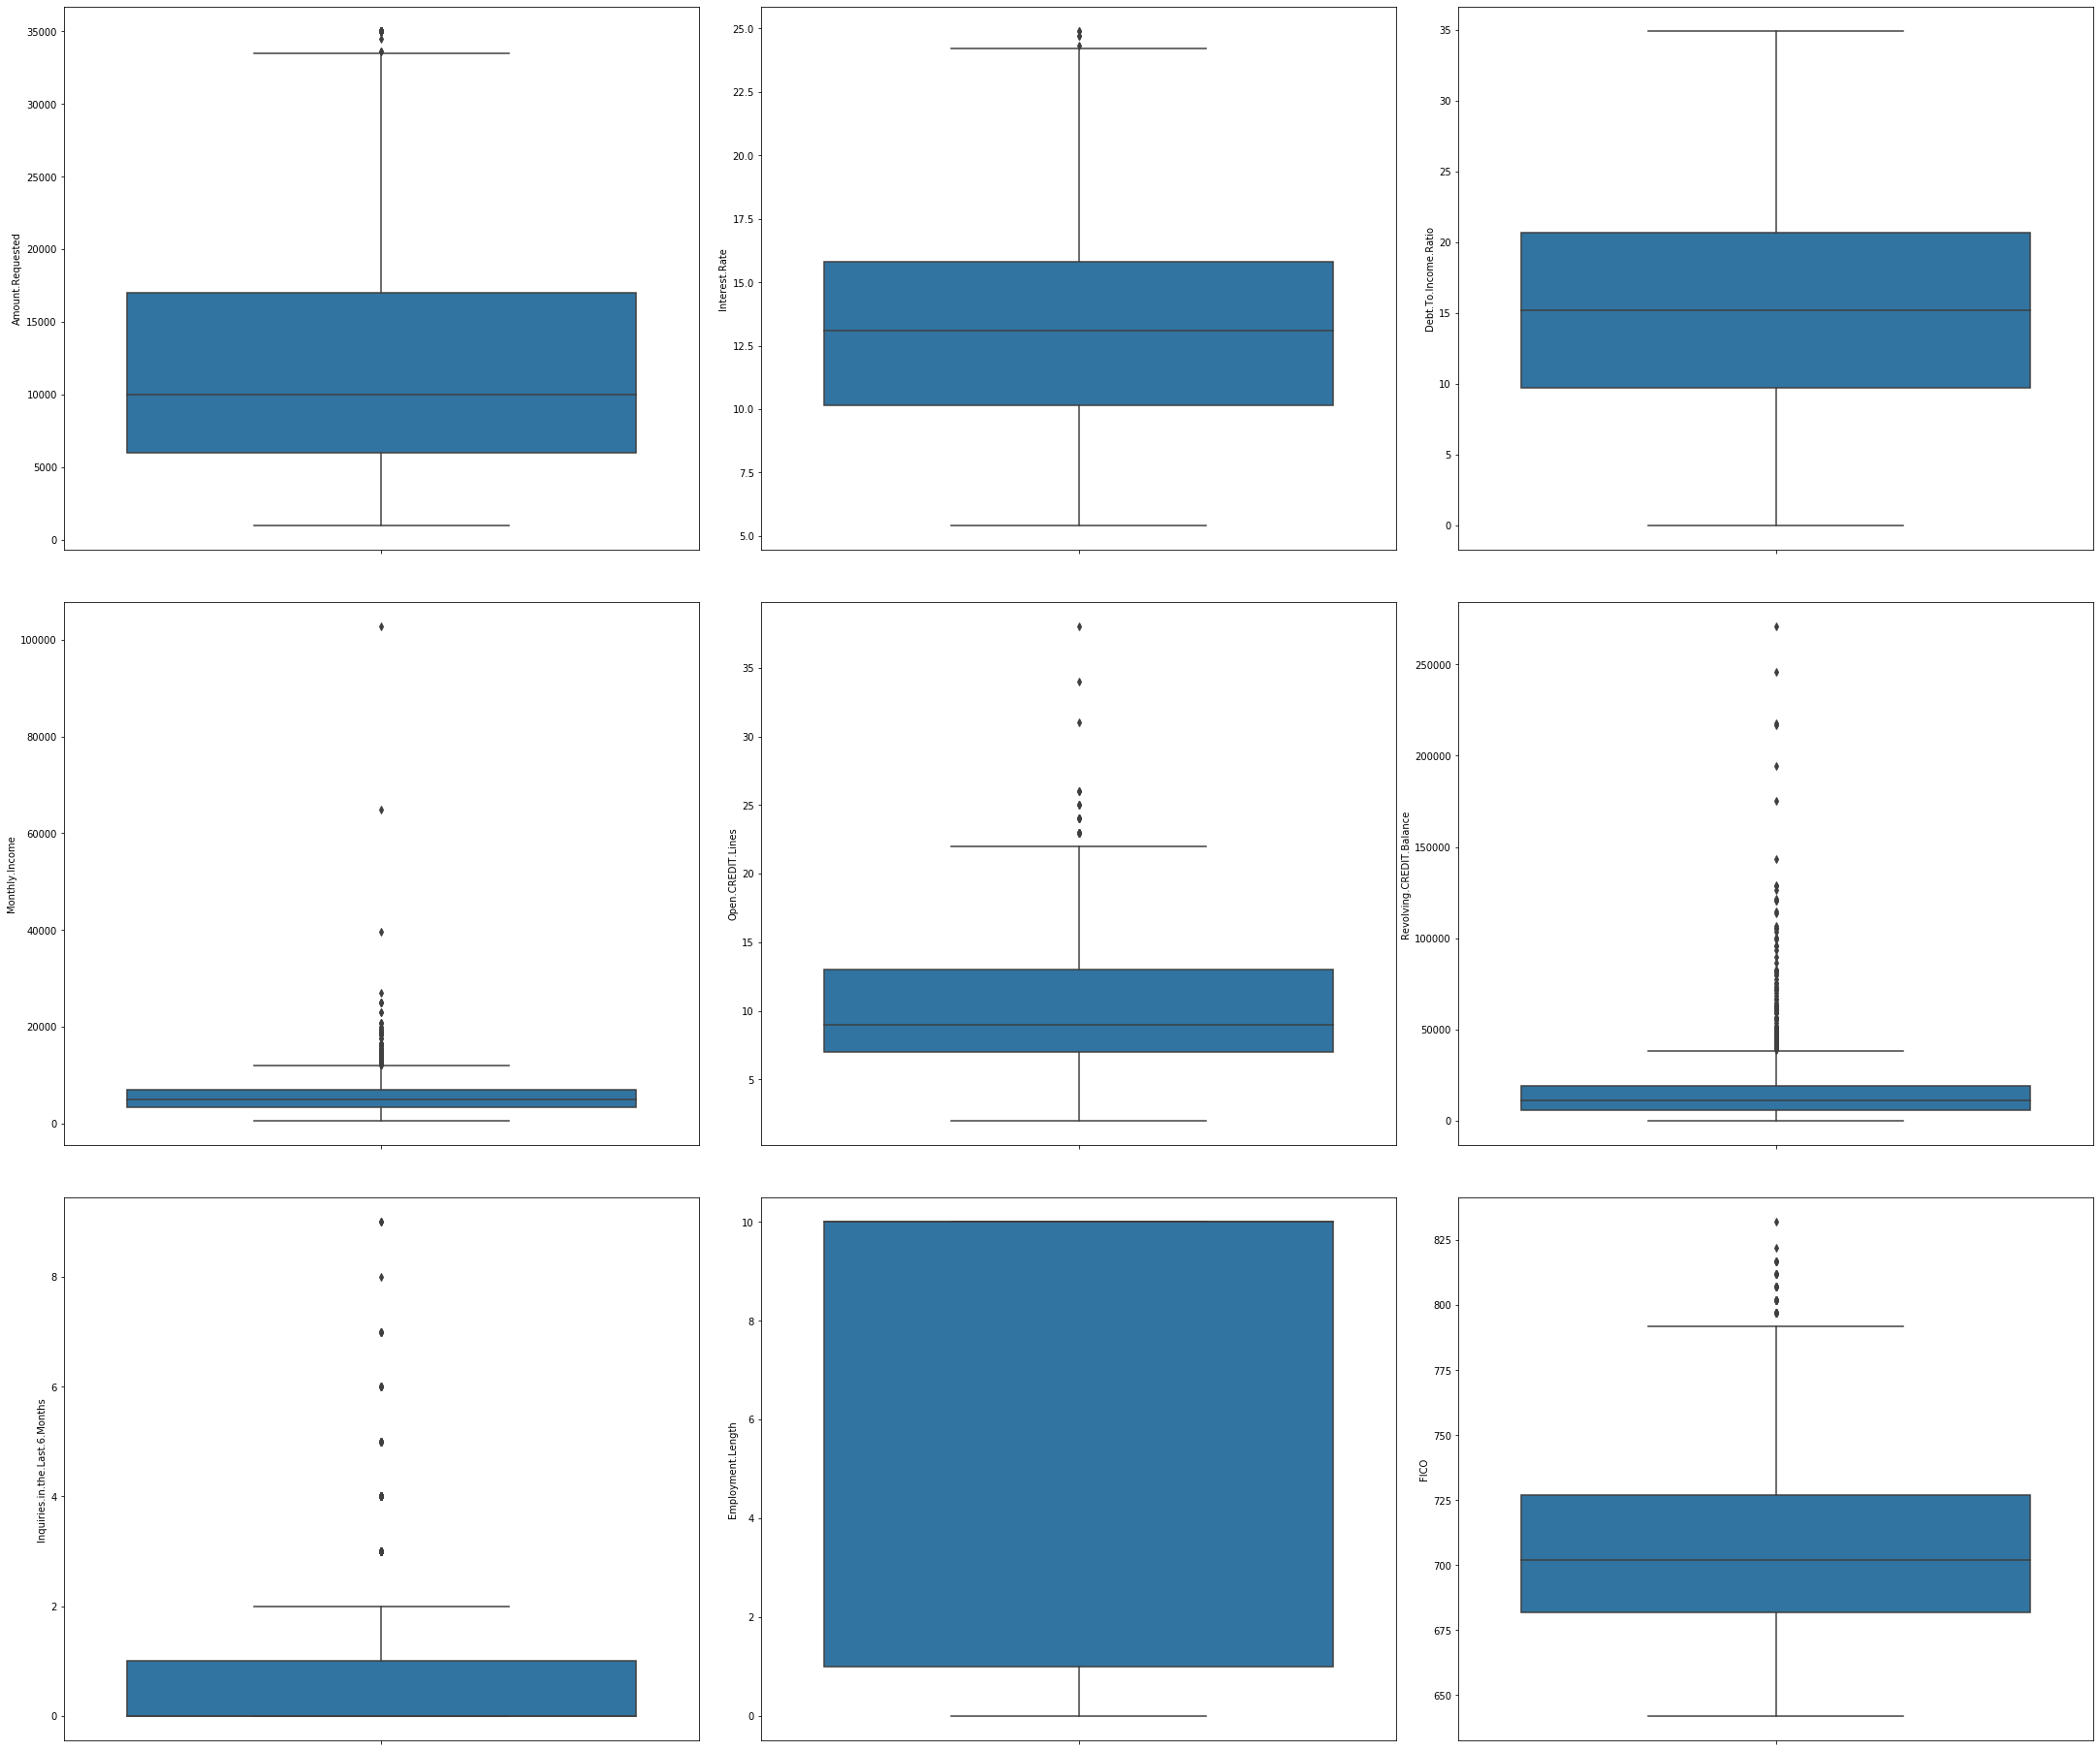

In [48]:
from scipy import stats

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(30, 25))
index = 0
axs = axs.flatten()
for k,v in numerical.items():
    sns.boxplot(y=k, data=numerical, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [49]:
for k, v in numerical.items(): #k=column_name, v=values
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(numerical)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column Amount.Requested outliers = 2.32%
Column Interest.Rate outliers = 0.23%
Column Debt.To.Income.Ratio outliers = 0.00%
Column Monthly.Income outliers = 4.95%
Column Open.CREDIT.Lines outliers = 1.55%
Column Revolving.CREDIT.Balance outliers = 5.64%
Column Inquiries.in.the.Last.6.Months outliers = 10.09%
Column Employment.Length outliers = 0.00%
Column FICO outliers = 2.23%


In [50]:
df_train.isnull().sum()

Amount.Requested                      5
Interest.Rate                         0
Debt.To.Income.Ratio                  1
Monthly.Income                        3
Open.CREDIT.Lines                     7
Revolving.CREDIT.Balance              5
Inquiries.in.the.Last.6.Months        3
Employment.Length                  1237
FICO                                  0
Loan.Length.36 months                 0
Loan.Length.60 months                 0
Loan.Purpose.debt_consolidation       0
Loan.Purpose.credit_card              0
Loan.Purpose.other                    0
Loan.Purpose.home_improvement         0
Loan.Purpose.major_purchase           0
Loan.Purpose.small_business           0
Loan.Purpose.car                      0
Loan.Purpose.wedding                  0
Loan.Purpose.medical                  0
Loan.Purpose.moving                   0
State.CA                              0
State.NY                              0
State.FL                              0
State.TX                              0


In [51]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [54]:
df_train = pd.DataFrame(imputer.fit_transform(df_train), columns=df_train.columns)

In [55]:
df_train.isnull().sum()

Amount.Requested                   0
Interest.Rate                      0
Debt.To.Income.Ratio               0
Monthly.Income                     0
Open.CREDIT.Lines                  0
Revolving.CREDIT.Balance           0
Inquiries.in.the.Last.6.Months     0
Employment.Length                  0
FICO                               0
Loan.Length.36 months              0
Loan.Length.60 months              0
Loan.Purpose.debt_consolidation    0
Loan.Purpose.credit_card           0
Loan.Purpose.other                 0
Loan.Purpose.home_improvement      0
Loan.Purpose.major_purchase        0
Loan.Purpose.small_business        0
Loan.Purpose.car                   0
Loan.Purpose.wedding               0
Loan.Purpose.medical               0
Loan.Purpose.moving                0
State.CA                           0
State.NY                           0
State.FL                           0
State.TX                           0
State.PA                           0
State.IL                           0
S

In [56]:
X_train, y_train = df_train.loc[:,df_train.columns!="Interest.Rate"].values, df_train["Interest.Rate"].values
X_train.shape, y_train.shape

((2200, 49), (2200,))

In [57]:
from sklearn.preprocessing import StandardScaler #mean=0, std_deviation=1.0
std = StandardScaler().fit(X_train)
X_train = std.transform(X_train)

In [59]:
def preprocessing(dataframe, to_store, std):
    
    #Operation1
    dataframe = dataframe.drop(['ID','Amount.Funded.By.Investors'],axis=1)
    
    #Operation2
    for col in ['Amount.Requested', 'Open.CREDIT.Lines','Revolving.CREDIT.Balance']:
        dataframe[col]=pd.to_numeric(dataframe[col],errors='coerce')
    
    #Operation3
    for col in ['Debt.To.Income.Ratio']:
        dataframe[col] = dataframe[col].str.replace("%","") 
    
    for col in ['Debt.To.Income.Ratio']:
        dataframe[col]=pd.to_numeric(dataframe[col],errors='coerce') 
    
    #Operation4
    k=dataframe['FICO.Range'].str.split("-",expand=True).astype(float)
    dataframe['fico']=0.5*(k[0]+k[1])
    del dataframe['FICO.Range']
    
    #Operation5
    dataframe['Employment.Length']=dataframe['Employment.Length'].str.replace('years',"")
    dataframe['Employment.Length']=dataframe['Employment.Length'].str.replace('year',"")
    
    dataframe['Employment.Length']=np.where(dataframe['Employment.Length'].str[:2]=="10",10,
                                       dataframe['Employment.Length'])

    dataframe['Employment.Length']=np.where(dataframe['Employment.Length'].str[0]=="<",0,
                                       dataframe['Employment.Length'])
    
    dataframe['Employment.Length']=pd.to_numeric(dataframe['Employment.Length'],errors='coerce')
    
    #Operation6
    for column, categories in to_store:
        for category in categories:
            name=column+'.'+category
            dataframe[name]=(dataframe[column]==category).astype(int)
        del dataframe[column]
    
    #Missing values
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    dataframe = pd.DataFrame(imputer.fit_transform(dataframe), columns=dataframe.columns)
    
    #data scaling
    X_test = dataframe.values
    X_test = std.transform(X_test) #standard scaling
    
    return X_test

In [74]:
X_test = preprocessing(df_test, to_store, std)
X_test.shape

(300, 49)

In [61]:

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
test_pred = lm.predict(X_test)

In [63]:
pd.DataFrame(test_pred).to_csv("mysubmission.csv",index=False)

In [64]:
result = pd.DataFrame(test_pred)

In [65]:
result

,0
0,16.604347
1,15.926720
2,10.413325
3,3.664191
4,15.392114
5,6.938386
6,15.744045
7,10.592913
8,15.957986
9,12.371336


In [75]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [76]:
model=Ridge()

In [68]:
alpha=np.linspace(1,100,100) #defiing range for values for lambda
params={'alpha':alpha}

In [77]:
grid_search = GridSearchCV(model, param_grid=params, cv=10, scoring='neg_mean_absolute_error')

In [78]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,...
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.]

In [79]:
grid_search.best_estimator_

Ridge(alpha=3.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
grid_search.cv_results_

{'mean_fit_time': array([0.01321104, 0.00790637, 0.0075069 , 0.00770636, 0.00850644,
        0.00840569, 0.00800586, 0.00750589, 0.00750639, 0.00790532,
        0.00850623, 0.00880544, 0.00820735, 0.00670276, 0.0060051 ,
        0.00710607, 0.00790582, 0.0086062 , 0.00640523, 0.00460308,
        0.00510428, 0.0053046 , 0.00520468, 0.00520396, 0.0058043 ,
        0.00560553, 0.00560377, 0.00550494, 0.00540457, 0.00500331,
        0.00440321, 0.00450325, 0.00470366, 0.00460265, 0.00410397,
        0.0055032 , 0.00560398, 0.00630455, 0.00530374, 0.00420322,
        0.0037045 , 0.00400441, 0.00390294, 0.00390286, 0.00390325,
        0.0043031 , 0.00490444, 0.00450375, 0.00390339, 0.0036025 ,
        0.00360281, 0.00330296, 0.0035028 , 0.00350378, 0.00310271,
        0.00420308, 0.00410354, 0.00400369, 0.00360255, 0.00350254,
        0.00380268, 0.00300257, 0.0030031 , 0.00300248, 0.00330148,
        0.00360358, 0.00320318, 0.00340321, 0.003403  , 0.00320237,
        0.00350332, 0.00350232,

In [86]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.10f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [87]:
report(grid_search.cv_results_,100)

Model with rank: 1
Mean validation score: -1.6181887905 (std: 0.119)
Parameters: {'alpha': 3.0}

Model with rank: 2
Mean validation score: -1.6181892278 (std: 0.119)
Parameters: {'alpha': 4.0}

Model with rank: 3
Mean validation score: -1.6182099663 (std: 0.119)
Parameters: {'alpha': 2.0}

Model with rank: 4
Mean validation score: -1.6182296715 (std: 0.119)
Parameters: {'alpha': 5.0}

Model with rank: 5
Mean validation score: -1.6182813293 (std: 0.120)
Parameters: {'alpha': 1.0}

Model with rank: 6
Mean validation score: -1.6184021314 (std: 0.118)
Parameters: {'alpha': 6.0}

Model with rank: 7
Mean validation score: -1.6185468492 (std: 0.118)
Parameters: {'alpha': 7.0}

Model with rank: 8
Mean validation score: -1.6186721711 (std: 0.118)
Parameters: {'alpha': 8.0}

Model with rank: 9
Mean validation score: -1.6187816275 (std: 0.118)
Parameters: {'alpha': 9.0}

Model with rank: 10
Mean validation score: -1.6188811145 (std: 0.118)
Parameters: {'alpha': 10.0}

Model with rank: 11
Mean val

In [88]:
test_pred=grid_search.predict(X_test)

In [89]:
pd1=pd.DataFrame(test_pred)

In [90]:
pd1

,0
0,16.606338
1,15.925934
2,10.416507
3,3.686353
4,15.391954
5,6.948768
6,15.746591
7,10.597752
8,15.957284
9,12.377337


In [91]:
ridge_model = grid_search.best_estimator_

In [92]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [93]:
model=Lasso()

In [94]:
alpha=np.linspace(1,100,100) #defiing range for values for lambda
params={'alpha':alpha}

In [95]:
grid_search = GridSearchCV(model, param_grid=params, cv=10, scoring='neg_mean_absolute_error')

In [96]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  1...
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [97]:
grid_search.best_estimator_

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [98]:
grid_search.cv_results_

{'mean_fit_time': array([0.02933798, 0.0063267 , 0.00829649, 0.00781226, 0.00468698,
        0.00553396, 0.01732316, 0.00948901, 0.00842597, 0.00596025,
        0.00773034, 0.00880063, 0.01159816, 0.00840077, 0.0071259 ,
        0.00708685, 0.00680008, 0.00800078, 0.00760138, 0.00788553,
        0.00711038, 0.0015625 , 0.0067126 , 0.00720117, 0.0067013 ,
        0.00599985, 0.00600028, 0.00600028, 0.00360053, 0.00560076,
        0.0060003 , 0.00480123, 0.0060003 , 0.00520015, 0.00520082,
        0.00719912, 0.00840039, 0.00480046, 0.00359986, 0.00399828,
        0.00440013, 0.0044004 , 0.00320044, 0.00320079, 0.00400007,
        0.00400026, 0.00440025, 0.00520012, 0.00440016, 0.00680072,
        0.00280552, 0.00200036, 0.00320528, 0.0035619 , 0.00156245,
        0.00358274, 0.00312562, 0.00518641, 0.00468802, 0.00156255,
        0.00357475, 0.00436924, 0.00468802, 0.00472491, 0.0051327 ,
        0.0072144 , 0.00720031, 0.00359645, 0.00480063, 0.00400035,
        0.00360224, 0.0048008 ,

In [99]:
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

NameError: name 'n_top' is not defined

In [100]:
report(grid_search.cv_results_,100)

Model with rank: 1
Mean validation score: -2.1092555308 (std: 0.125)
Parameters: {'alpha': 1.0}

Model with rank: 2
Mean validation score: -2.8395041195 (std: 0.151)
Parameters: {'alpha': 2.0}

Model with rank: 3
Mean validation score: -3.3658529831 (std: 0.157)
Parameters: {'alpha': 3.0}

Model with rank: 4
Mean validation score: -3.3663362305 (std: 0.157)
Parameters: {'alpha': 4.0}

Model with rank: 4
Mean validation score: -3.3663362305 (std: 0.157)
Parameters: {'alpha': 5.0}

Model with rank: 4
Mean validation score: -3.3663362305 (std: 0.157)
Parameters: {'alpha': 6.0}

Model with rank: 4
Mean validation score: -3.3663362305 (std: 0.157)
Parameters: {'alpha': 7.0}

Model with rank: 4
Mean validation score: -3.3663362305 (std: 0.157)
Parameters: {'alpha': 8.0}

Model with rank: 4
Mean validation score: -3.3663362305 (std: 0.157)
Parameters: {'alpha': 9.0}

Model with rank: 4
Mean validation score: -3.3663362305 (std: 0.157)
Parameters: {'alpha': 10.0}

Model with rank: 4
Mean valid